# Central Limit Theorem - Lab

## Introduction

In this lab, we'll learn how to use the Central Limit Theorem to work with non-normally distributed datasets as if they were normally distributed.  

## Objectives
You will be able to:
* Use built-in methods to detect non-normal datasets
* Create a sampling distribution of sample means to demonstrate the central limit theorem

## Let's get started!

First, import the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

Next, read in the dataset.  A dataset of 10,000 numbers is stored in `non_normal_dataset.csv`. Use pandas to read the data into a series.

**_Hint:_** Any of the `read_` methods in pandas will store 1-dimensional in a Series instead of a DataFrame if passed the optimal parameter `squeeze=True`.

In [5]:
# Your code here
df = pd.read_csv('non_normal_dataset.csv')
ds = pd.read_csv('non_normal_dataset.csv', squeeze=True)
ds

0        5
1        3
2        3
3        1
4       13
        ..
9995    99
9996    98
9997    95
9998    94
9999    97
Name: 3, Length: 10000, dtype: int64

## Detecting Non-Normal Datasets

Before we can make use of the normal distribution, we need to first confirm that our data is normally distributed.  If it is not, then we'll need to use the Central Limit Theorem to create a sample distribution of sample means that will be normally distributed.  

There are two main ways to check if a sample follows the normal distribution or not.  The easiest is to simply plot the data and visually check if the data follows a normal curve or not.  

In the cell below, use `seaborn`'s `distplot` method to visualize a histogram of the distribution overlaid with the probability density curve.  

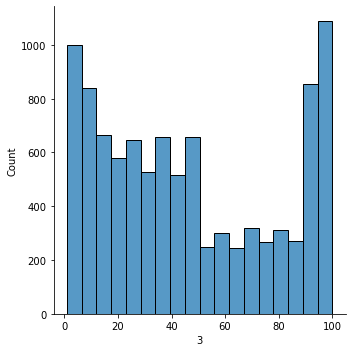

In [6]:
# Your code here
sns.displot(ds)

As expected, this dataset is not normally distributed.  

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test.  There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use of the `normaltest()` function from `scipy.stats`, which we imported as `st` --see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) if you have questions about how to use this method. 

In the cell below, use `normaltest()` to check if the dataset is normally distributed.  

In [7]:
# Your code here
st.normaltest(ds)

NormaltestResult(statistic=43432.811126532004, pvalue=0.0)

The output may seem a bit hard to interpret since we haven't covered hypothesis testing and p-values in further detail yet.  However, the function tests the hypothesis that the distribution passed into the function differs from the normal distribution. The null hypothesis would then be that the data *is* normally distributed. We typically reject the null hypothesis if the p-value is less than 0.05. For now, that's all you need to remember--this will make more sense once you work with p-values more which you'll do subsequently.  

Since our dataset is non-normal, that means we'll need to use the **_Central Limit Theorem._**

## Sampling With Replacement

In order to create a Sample Distribution of Sample Means, we need to first write a function that can sample *with* replacement.  

In the cell below, write a function that takes in an array of numbers `data` and a sample size `n` and returns an array that is a random sample of `data`, of size `n`.

In [9]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample
        

test_sample = get_sample(ds, 30)
print(test_sample[:5]) 
# [56, 12, 73, 24, 8] (This will change if you run it multiple times)

[56, 12, 73, 24, 8]


## Generating a Sample Mean

Next, we'll write another helper function that takes in a sample and returns the mean of that sample.  

In [11]:
def get_sample_mean(sample):
    return sum(sample)/len(sample)

test_sample2 = get_sample(ds, 30)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean) 
# 45.3 (This will also change if you run it multiple times)

45.3


### Creating a Sample Distribution of Sample Means

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sample distribution of sample means!

In the cell below, write a function that takes in 3 arguments: the dataset, the size of the distribution to create, and the size of each individual sample. The function should return a sample distribution of sample means of the given size.  

In [13]:
def create_sample_distribution(data, dist_size=100, n=30):
    s = []
    while len(s) != dist_size:
        sample = get_sample(data,n)
        sample_mean = get_sample_mean(sample)
        s.append(sample_mean)
    
    return s
    

test_sample_dist = create_sample_distribution(ds)
print(test_sample_dist[:5]) 

[48.86666666666667, 39.43333333333333, 49.7, 54.53333333333333, 60.666666666666664]


## Visualizing the Sample Distribution as it Becomes Normal

The sample distribution of sample means isn't guaranteed to be normal after it hits a magic size.  Instead, the distribution begins to approximate a normal distribution as it gets larger and larger.  Generally, 30 is accepted as the sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sample distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.  

Let's create some sample distributions of different sizes and watch the Central Limit Theorem kick in. As the sample size increases, you'll see the distributions begin to approximate a normal distribution more closely.  

In the cell below, create a sample distribution from `data` of `dist_size` 10, with a sample size `n` of 3. Then, visualize this sample distribution with `distplot`.

C:\Users\chris\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

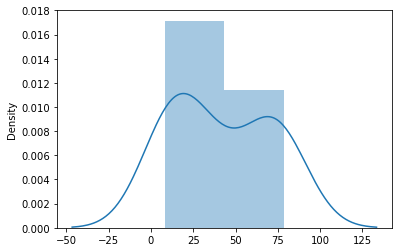

In [14]:
# Your code here
sample1 = create_sample_distribution(ds, dist_size=10, n=3)
sns.distplot(sample1)

Now, let's increase the `dist_size` to 30, and `n` to 10.  Create another visualization to compare how it changes as size increases.  

C:\Users\chris\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

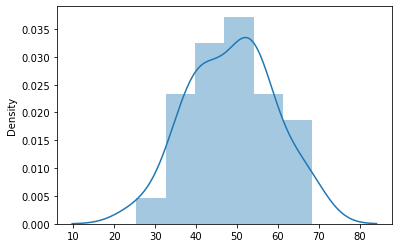

In [15]:
# Your code here
sample2 = create_sample_distribution(ds, dist_size=30, n=10)
sns.distplot(sample2)

The data is already looking much more 'normal' than the first sample distribution, and much more 'normal' that the raw non-normal distribution we're sampling from. 

In the cell below, create another sample distribution of `data` with `dist_size` 1000 and `n` of 30.  Visualize it to confirm the normality of this new distribution. 

C:\Users\chris\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

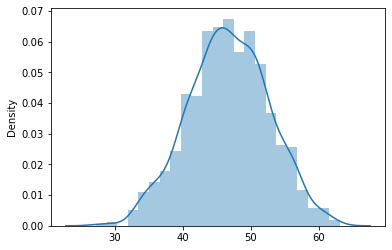

In [16]:
# Your code here
sample3 = create_sample_distribution(ds, dist_size=1000, n=30)
sns.distplot(sample3)

Great! As you can see, the dataset _approximates_ a normal distribution. It isn't pretty, but it's generally normal enough that we can use it to answer statistical questions using $z$-scores and p-values.  

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sample distribution should also approximate the population mean and standard deviation from the original non-normal dataset!  Although it's outside the scope of this lab, we could also use the same sampling methods seen here to approximate other parameters from any non-normal distribution, such as the median or mode!

## Summary

In this lab, we learned to apply the central limit theorem in practice. We learned how to determine if a dataset is normally distributed or not. From there, we used a function to sample with replacement and generate sample means. Afterwards, we created a normal distribution of sample means in order to answer questions about non-normally distributed datasets.  